# Machine Learning Project 1
# Kama, Rosa or Canadian wheat seed?

## Task 0 - Prepare the data

In [48]:
import numpy as np
data = np.loadtxt("./train.txt")
X, y = data[:, :-1], data[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## Task 1 - Train your first Decision Tree

Accuracy on training data: 0.70
Accuracy on testing data: 0.55


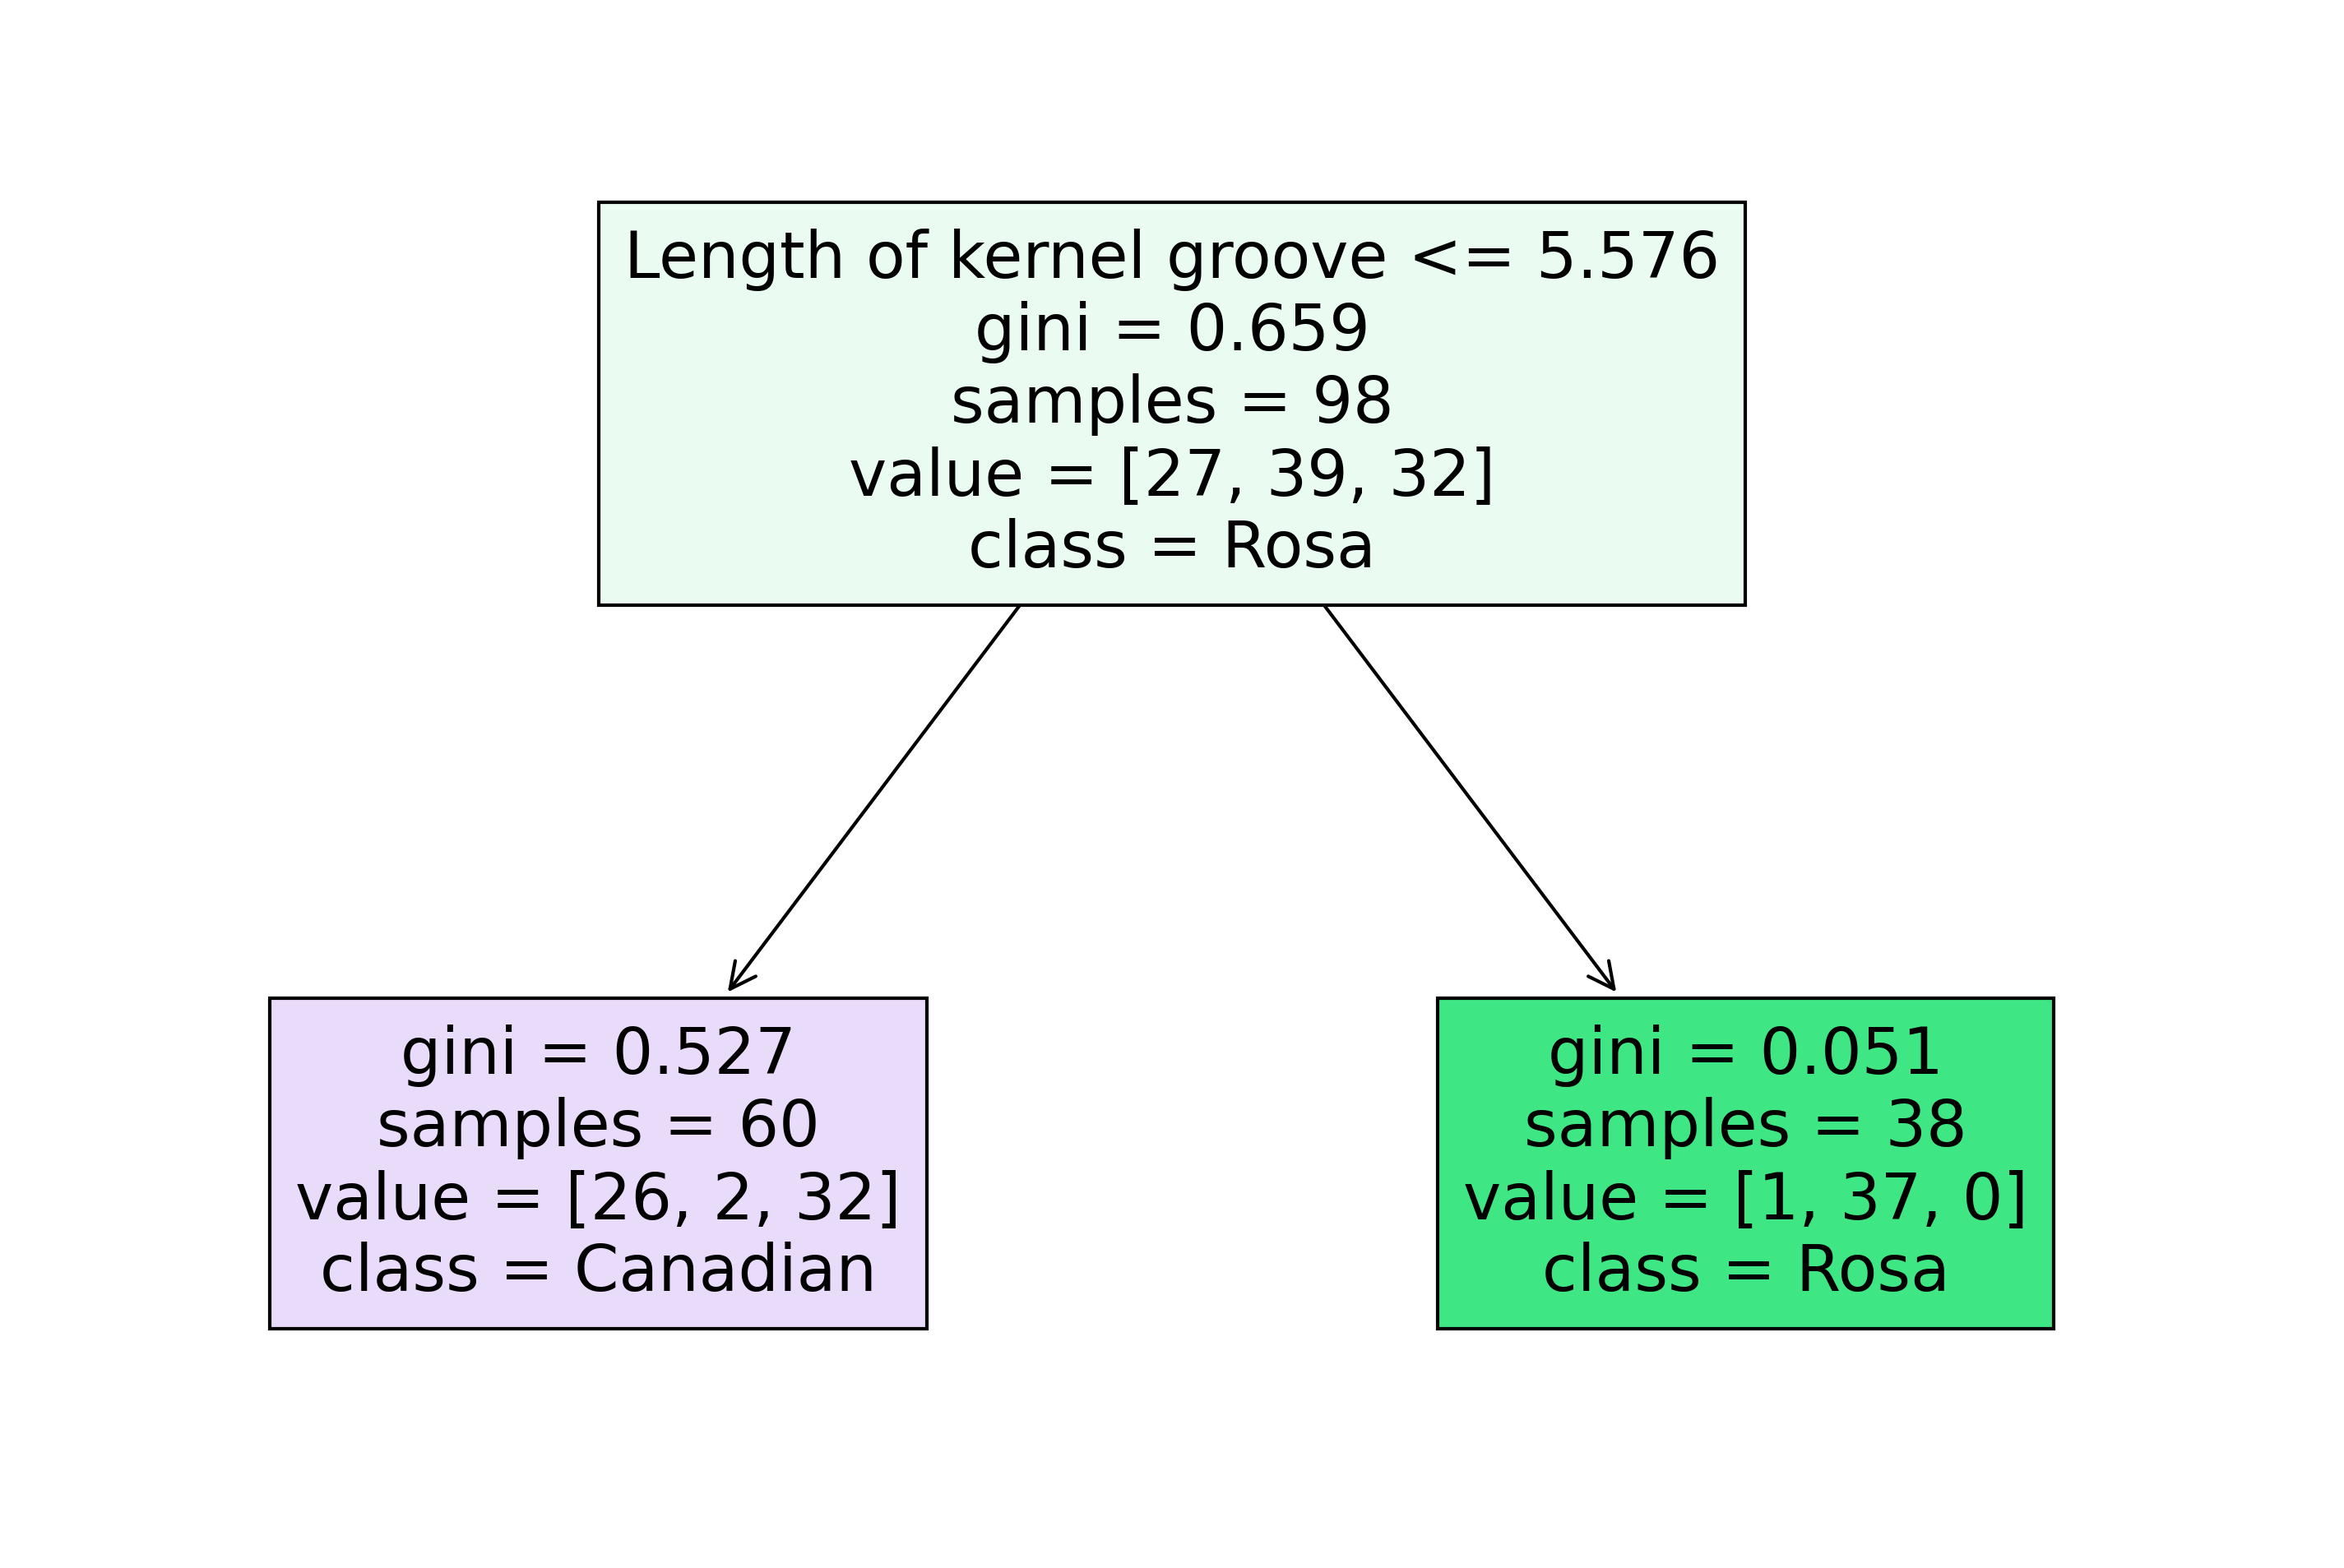

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import utils
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

criterion = "gini"
max_depth = 1
min_samples_split = 2
min_samples_leaf = 1
max_leaf_nodes = None
random_state = 42

dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes,random_state=random_state)
dtc=dtc.fit(X_train, y_train)

feature_names = utils.get_features()

y_train_p=dtc.predict(X_train)
y_test_p=dtc.predict(X_test)

plt.figure(figsize=(12, 8), dpi=300)

tree.plot_tree(dtc, feature_names=feature_names, class_names=["Kama", "Rosa", "Canadian"], filled=True)

plt.savefig("decision_tree_high_resolution.png")

train_accuracy=accuracy_score(y_train,y_train_p)
test_accuracy=accuracy_score(y_test,y_test_p)

print(f"Accuracy on training data: {train_accuracy:.2f}")
print(f"Accuracy on testing data: {test_accuracy:.2f}")

## Task 2 - Train another Decision Tree

Accuracy on training data: 1.00
Accuracy on testing data: 0.86


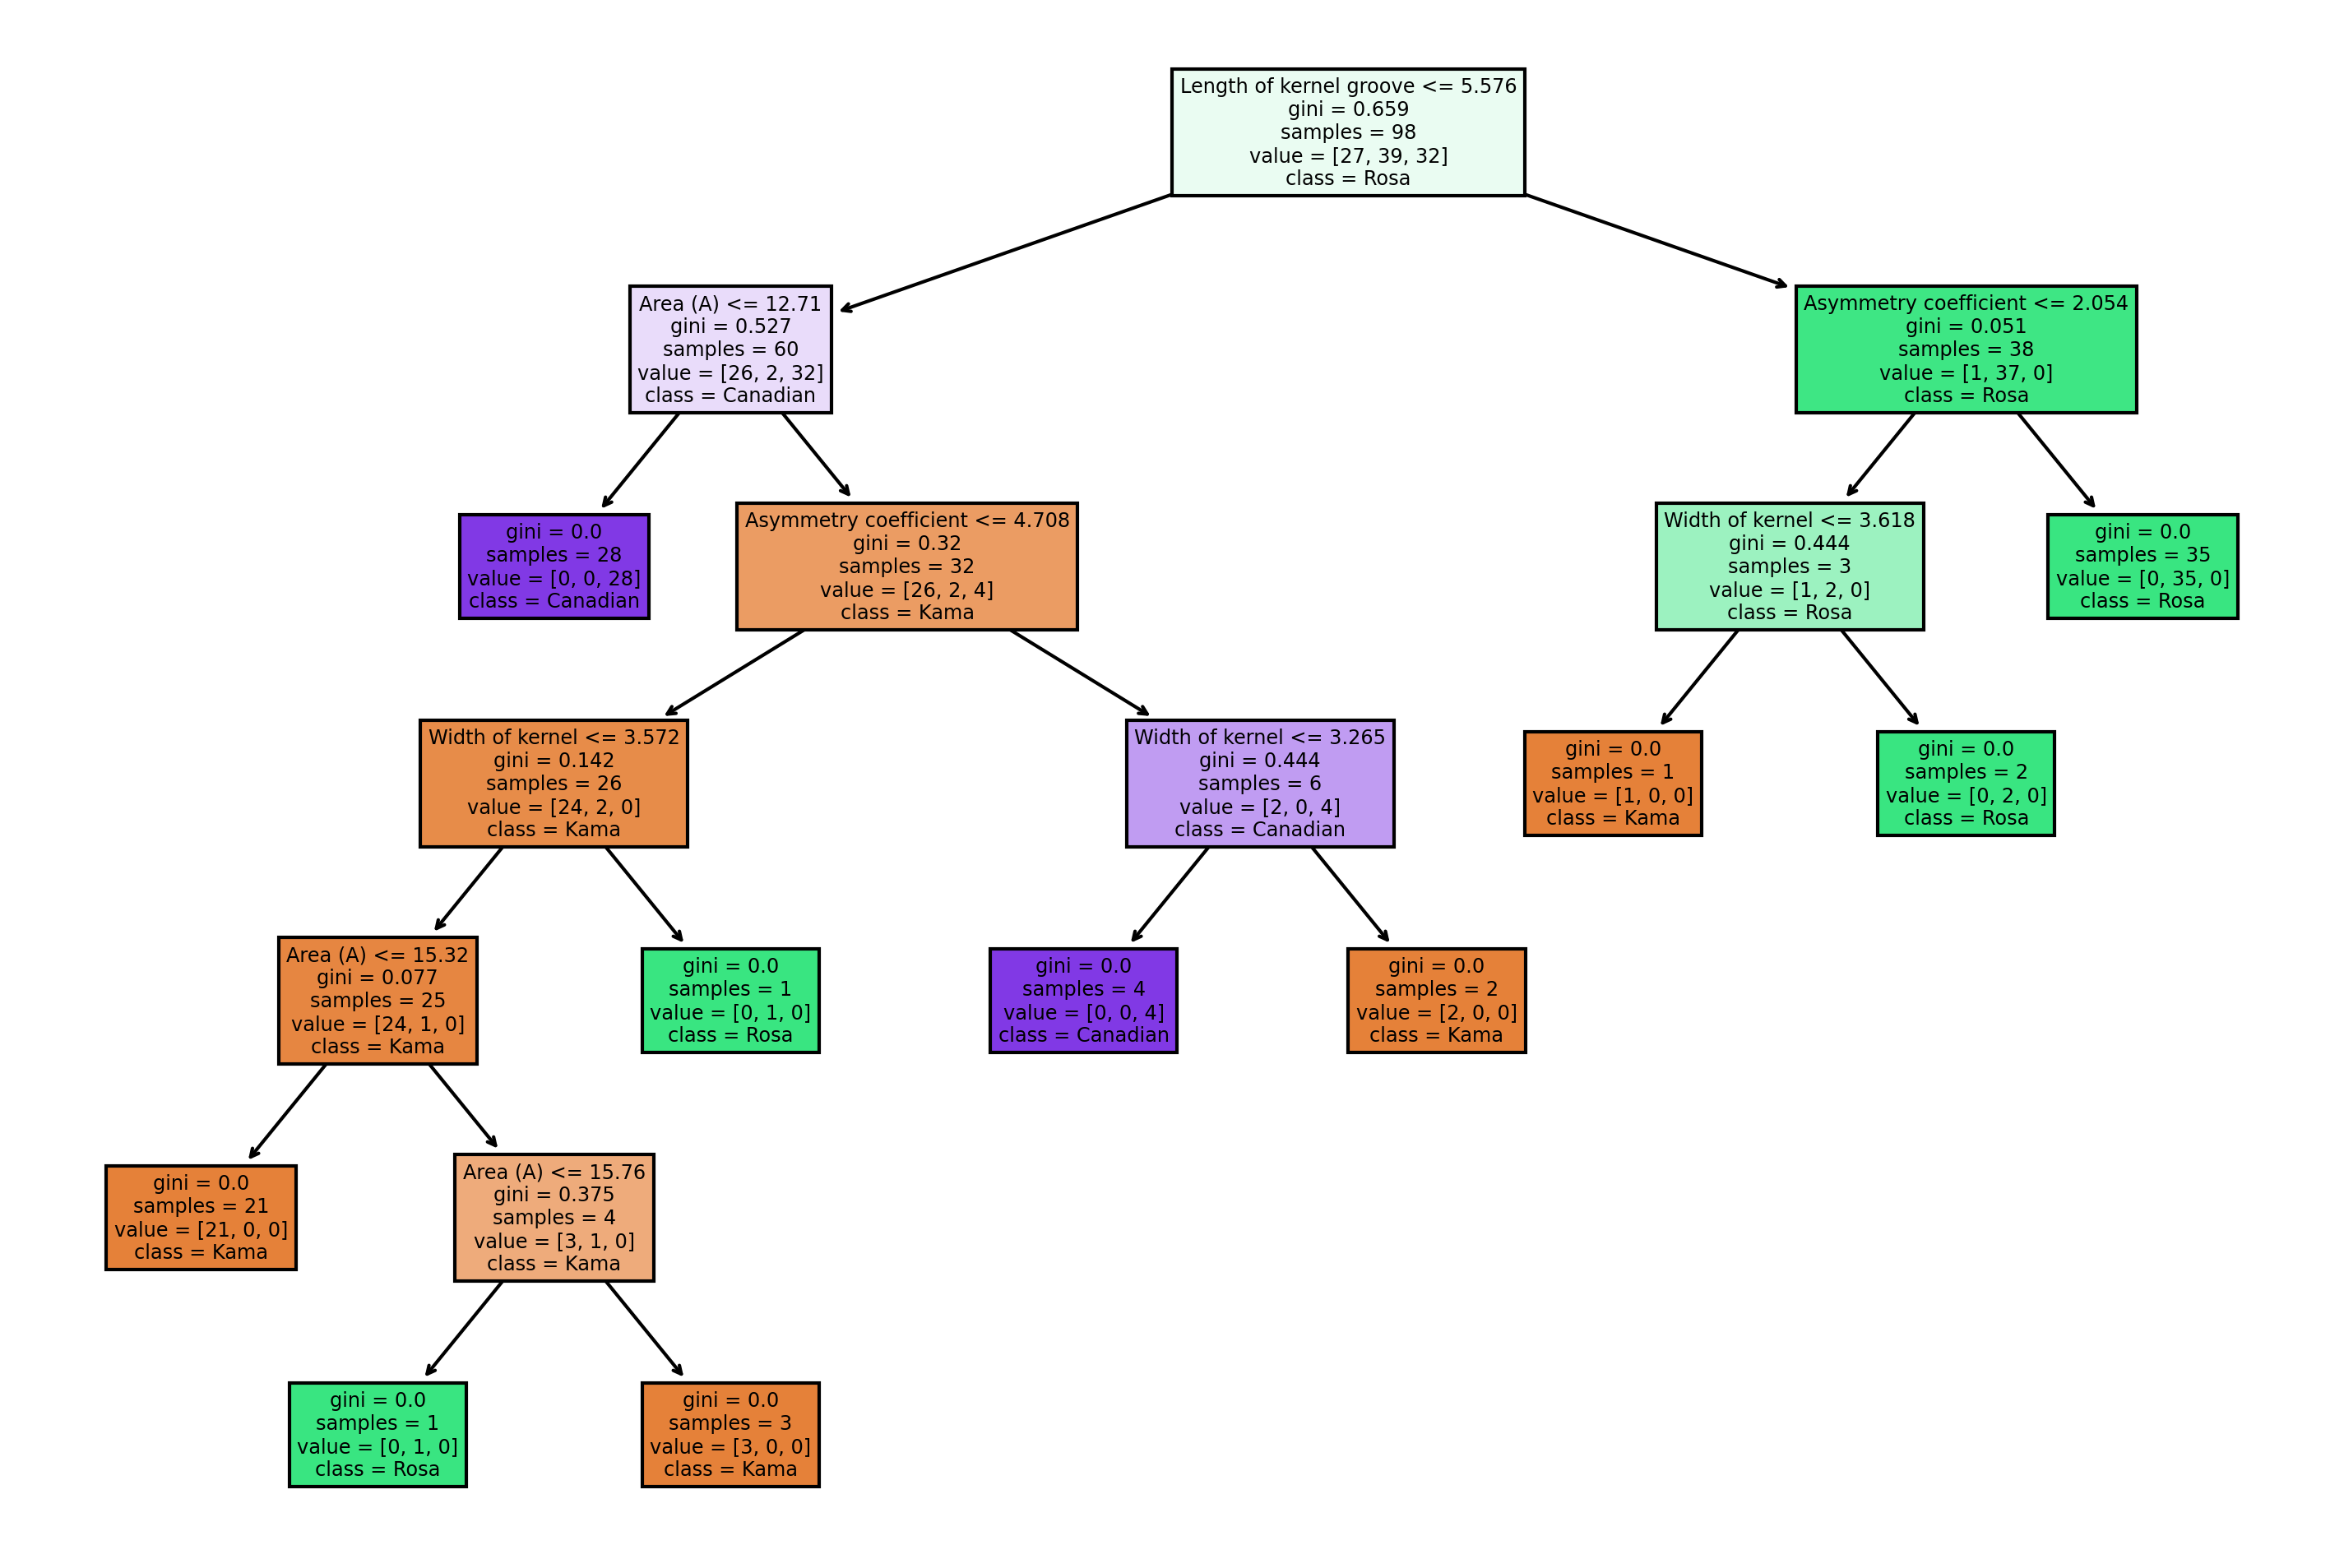

In [40]:
criterion = "gini"
max_depth = 6
min_samples_split = 2
min_samples_leaf = 1
max_leaf_nodes = None
random_state = 42

dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes,random_state=random_state)
dtc.fit(X_train, y_train)

feature_names = utils.get_features()

y_train_p=dtc.predict(X_train)
y_test_p=dtc.predict(X_test)

plt.figure(figsize=(12, 8), dpi=300)

tree.plot_tree(dtc, feature_names=feature_names, class_names=["Kama", "Rosa", "Canadian"], filled=True)

plt.savefig("decision_tree_high_resolution_6.png")

train_accuracy=accuracy_score(y_train,y_train_p)
test_accuracy=accuracy_score(y_test,y_test_p)

print(f"Accuracy on training data: {train_accuracy:.2f}")
print(f"Accuracy on testing data: {test_accuracy:.2f}")

## Task 3 - Find the best Decision Tree

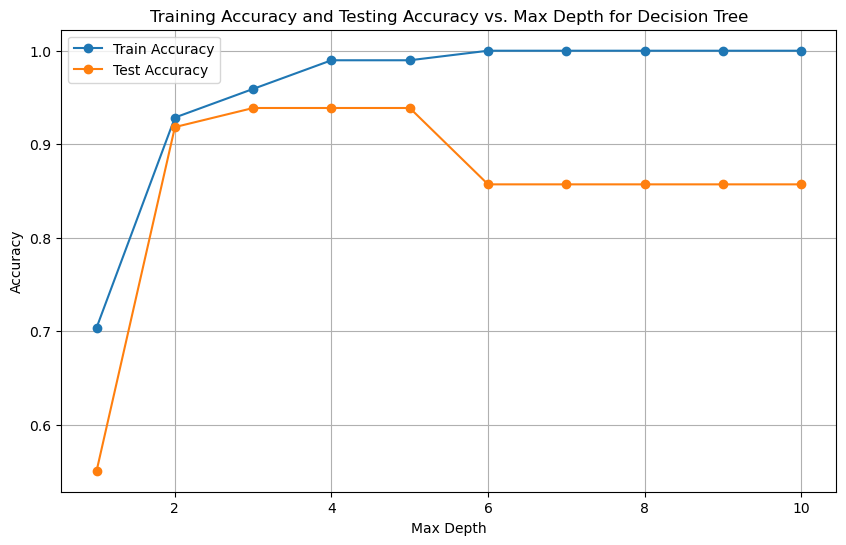

In [55]:
criterion = "gini"
min_samples_split = 2
min_samples_leaf = 1
max_leaf_nodes = None
random_state = 42

train_accuracies = []
test_accuracies = []

max_depths = range(1, 11)

for max_depth in max_depths:
    dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes,random_state=random_state)
    dtc.fit(X_train, y_train)
    
 
    y_train_p=dtc.predict(X_train)
    y_test_p=dtc.predict(X_test)

    train_accuracy=accuracy_score(y_train,y_train_p)
    train_accuracies.append(train_accuracy)
    test_accuracy=accuracy_score(y_test,y_test_p)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training Accuracy and Testing Accuracy vs. Max Depth for Decision Tree')
plt.legend()
plt.grid(True)

plt.savefig("decision_tree_accuracy_vs_max_depth.png")

plt.show()


## Task 4 - Join the leaderboard!

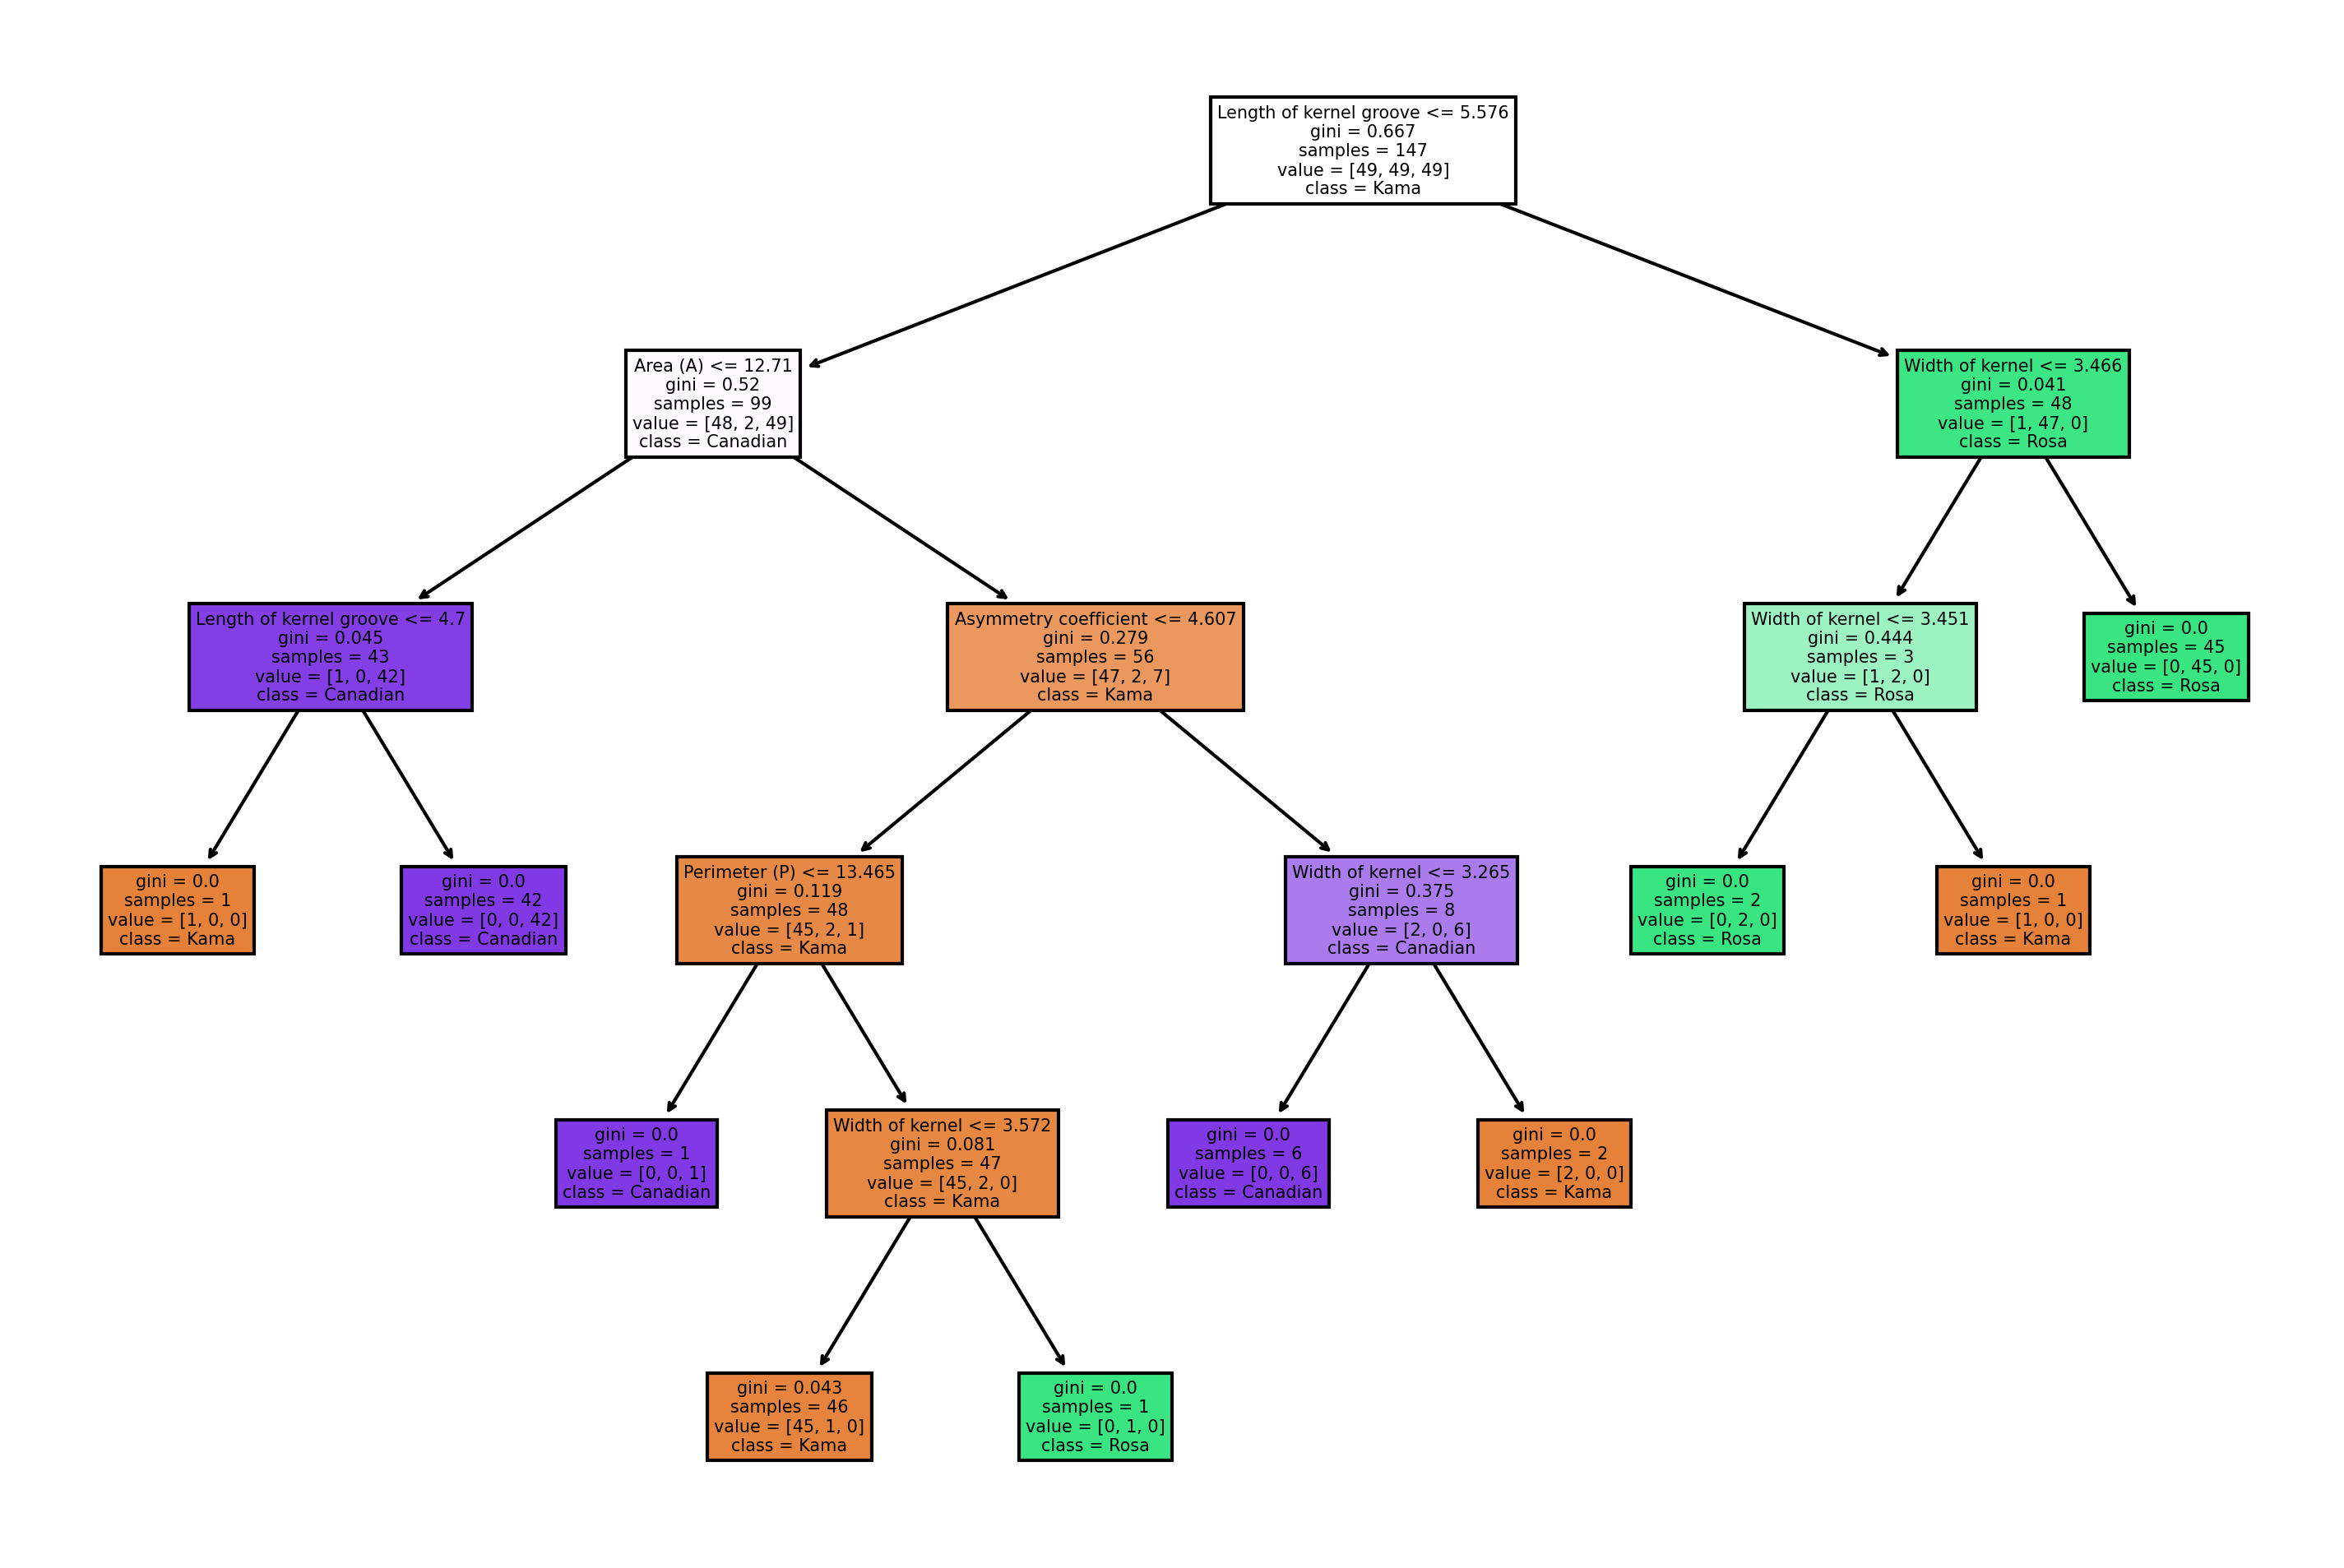

In [57]:
import utils
criterion = "gini"
max_depth = 5
min_samples_split = 2
min_samples_leaf = 1
max_leaf_nodes = None
random_state = 42

data = np.loadtxt("./trainconcours.txt")
X, y = data[:, :-1], data[:, -1]
dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes,random_state=random_state)
dtc.fit(X, y)

feature_names = utils.get_features()

plt.figure(figsize=(12, 8), dpi=300)

tree.plot_tree(dtc, feature_names=feature_names, class_names=["Kama", "Rosa", "Canadian"], filled=True)

plt.savefig("decision_tree_high_resolution_6.png")

train_accuracy=accuracy_score(y_train,y_train_p)
test_accuracy=accuracy_score(y_test,y_test_p)

dataconcours=utils.generate_submission(dtc,"test.txt")
